In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [205]:
data = pd.read_csv(r'C:\Users\Santhosh\Desktop\CapstoneProject\Capstone\Banking & Insurance analytics\motor_data11-14lats.csv')

In [206]:
data.head()

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,0,08-AUG-13,07-AUG-14,08,1202,519755.22,7209.140,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
1,0,08-AUG-12,07-AUG-13,08,1202,519755.22,7203.890,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
2,0,08-AUG-11,07-AUG-12,08,1202,519755.22,7045.804,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
3,0,08-JUL-11,07-AUG-11,08,1202,519755.22,287.250,5000029885,2007.0,4.0,6.0,Pick-up,3153.0,NISSAN,Own Goods,NaN
4,0,08-AUG-13,07-AUG-14,08,1202,285451.24,4286.900,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,19894.43


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293537 entries, 0 to 293536
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                293537 non-null  int64  
 1   INSR_BEGIN         293537 non-null  object 
 2   INSR_END           293537 non-null  object 
 3   EFFECTIVE_YR       293536 non-null  object 
 4   INSR_TYPE          293537 non-null  int64  
 5   INSURED_VALUE      293537 non-null  float64
 6   PREMIUM            293529 non-null  float64
 7   OBJECT_ID          293537 non-null  int64  
 8   PROD_YEAR          293431 non-null  float64
 9   SEATS_NUM          293397 non-null  float64
 10  CARRYING_CAPACITY  212172 non-null  float64
 11  TYPE_VEHICLE       293537 non-null  object 
 12  CCM_TON            293535 non-null  float64
 13  MAKE               293537 non-null  object 
 14  USAGE              293537 non-null  object 
 15  CLAIM_PAID         22373 non-null   float64
dtypes:

Checking the Null values by using the isnull function

In [208]:
data.isnull().sum()

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR              1
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                   8
OBJECT_ID                 0
PROD_YEAR               106
SEATS_NUM               140
CARRYING_CAPACITY     81365
TYPE_VEHICLE              0
CCM_TON                   2
MAKE                      0
USAGE                     0
CLAIM_PAID           271164
dtype: int64

In [209]:
print(data.columns)

Index(['SEX', 'INSR_BEGIN', 'INSR_END', 'EFFECTIVE_YR', 'INSR_TYPE',
       'INSURED_VALUE', 'PREMIUM', 'OBJECT_ID', 'PROD_YEAR', 'SEATS_NUM',
       'CARRYING_CAPACITY', 'TYPE_VEHICLE', 'CCM_TON', 'MAKE', 'USAGE',
       'CLAIM_PAID'],
      dtype='object')


### Handling missing values

In [210]:

date_cols = ['EFFECTIVE_YR']  # Replace with the actual date column names
for col in date_cols:
    data[col] = pd.to_datetime(data[col], format='%d-%b-%y', errors='coerce')



# Fill missing values for numerical columns with mean values
data['EFFECTIVE_YR'] = data['EFFECTIVE_YR'].fillna(data['EFFECTIVE_YR'].mean())
data['PROD_YEAR'] = data['PROD_YEAR'].fillna(data['PROD_YEAR'].mean())
data['SEATS_NUM'] = data['SEATS_NUM'].fillna(data['SEATS_NUM'].mean())
data['CCM_TON'] = data['CCM_TON'].fillna(data['CCM_TON'].mean())

In [211]:
# Drop the original date columns
data = data.drop(columns=date_cols)

In [212]:
# Drop CARRYING_CAPACITY & CLAIM_PAID column due to too many missing values
data = data.drop(columns=['CARRYING_CAPACITY', 'CLAIM_PAID'])

In [213]:
data.head()

,SEX,INSR_BEGIN,INSR_END,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,TYPE_VEHICLE,CCM_TON,MAKE,USAGE
0,0,08-AUG-13,07-AUG-14,1202,519755.22,7209.140,5000029885,2007.0,4.0,Pick-up,3153.0,NISSAN,Own Goods
1,0,08-AUG-12,07-AUG-13,1202,519755.22,7203.890,5000029885,2007.0,4.0,Pick-up,3153.0,NISSAN,Own Goods
2,0,08-AUG-11,07-AUG-12,1202,519755.22,7045.804,5000029885,2007.0,4.0,Pick-up,3153.0,NISSAN,Own Goods
3,0,08-JUL-11,07-AUG-11,1202,519755.22,287.250,5000029885,2007.0,4.0,Pick-up,3153.0,NISSAN,Own Goods
4,0,08-AUG-13,07-AUG-14,1202,285451.24,4286.900,5000029901,2010.0,4.0,Pick-up,2494.0,TOYOTA,Own Goods


In [214]:
data.isnull().sum()

SEX              0
INSR_BEGIN       0
INSR_END         0
INSR_TYPE        0
INSURED_VALUE    0
PREMIUM          8
OBJECT_ID        0
PROD_YEAR        0
SEATS_NUM        0
TYPE_VEHICLE     0
CCM_TON          0
MAKE             0
USAGE            0
dtype: int64

### Checking outliers

#### Box Plots
Box plots are a great way to visualize the distribution and identify outliers.

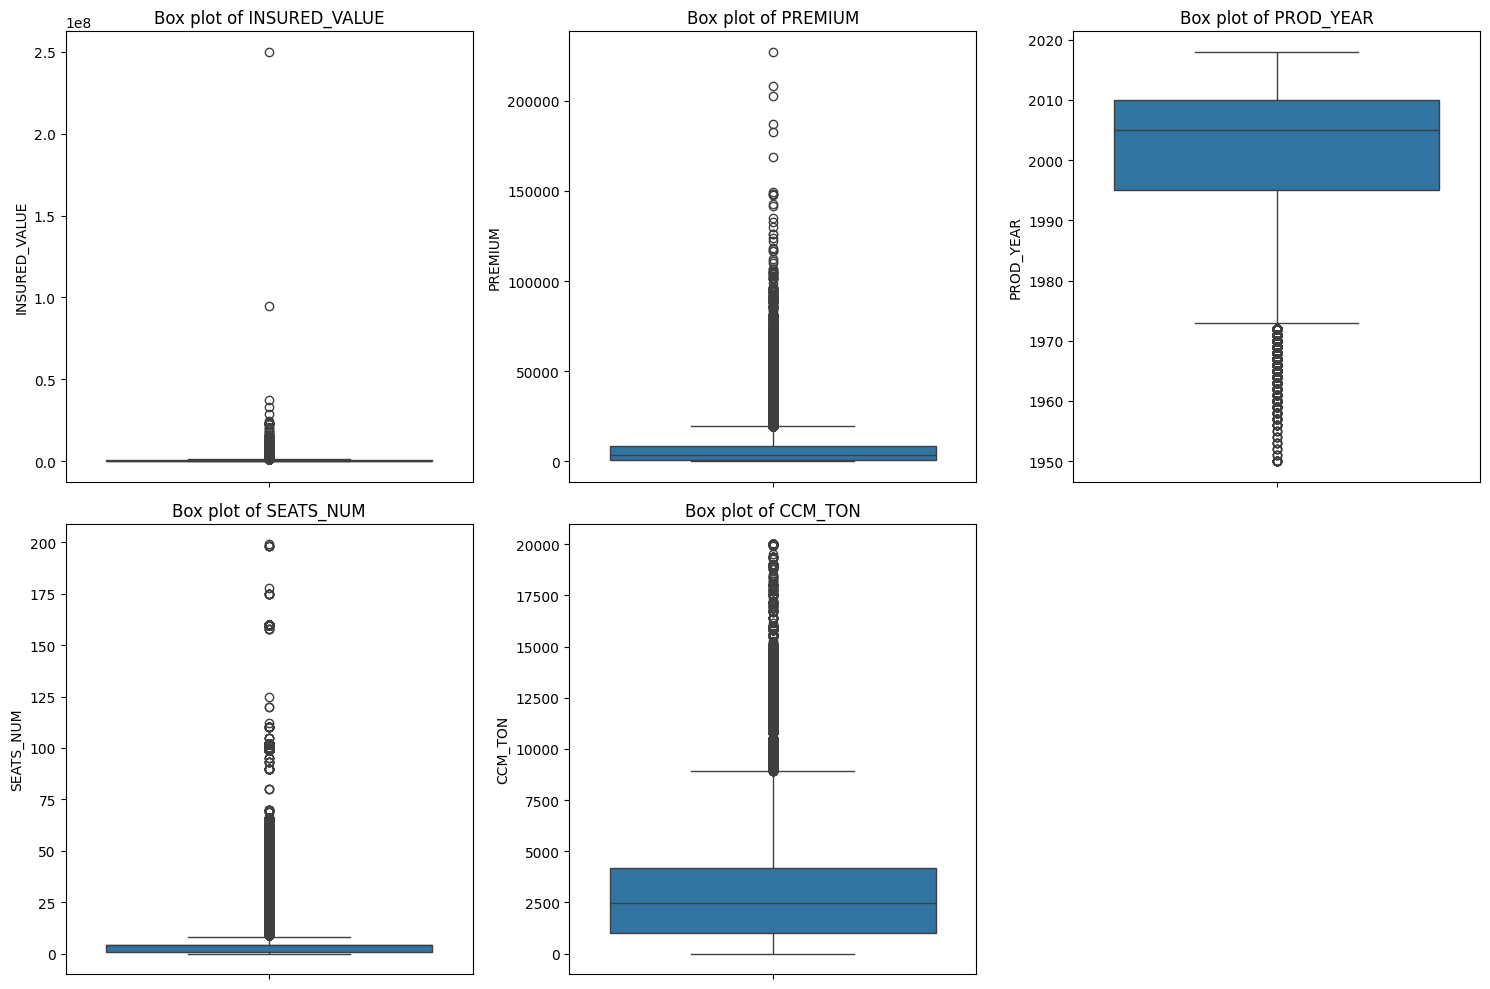

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for numerical columns
numerical_cols = ['INSURED_VALUE', 'PREMIUM', 'PROD_YEAR', 'SEATS_NUM', 'CCM_TON']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

### Removing outliers 

#### Impute Outliers
Replace outliers with a specific value, such as the mean or median.

In [216]:
# Impute outliers using median value
for col in numerical_cols:
    median = data[col].median()
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_limit, median, data[col])
    data[col] = np.where(data[col] > upper_limit, median, data[col])

Checking outliers after replace the outliers 

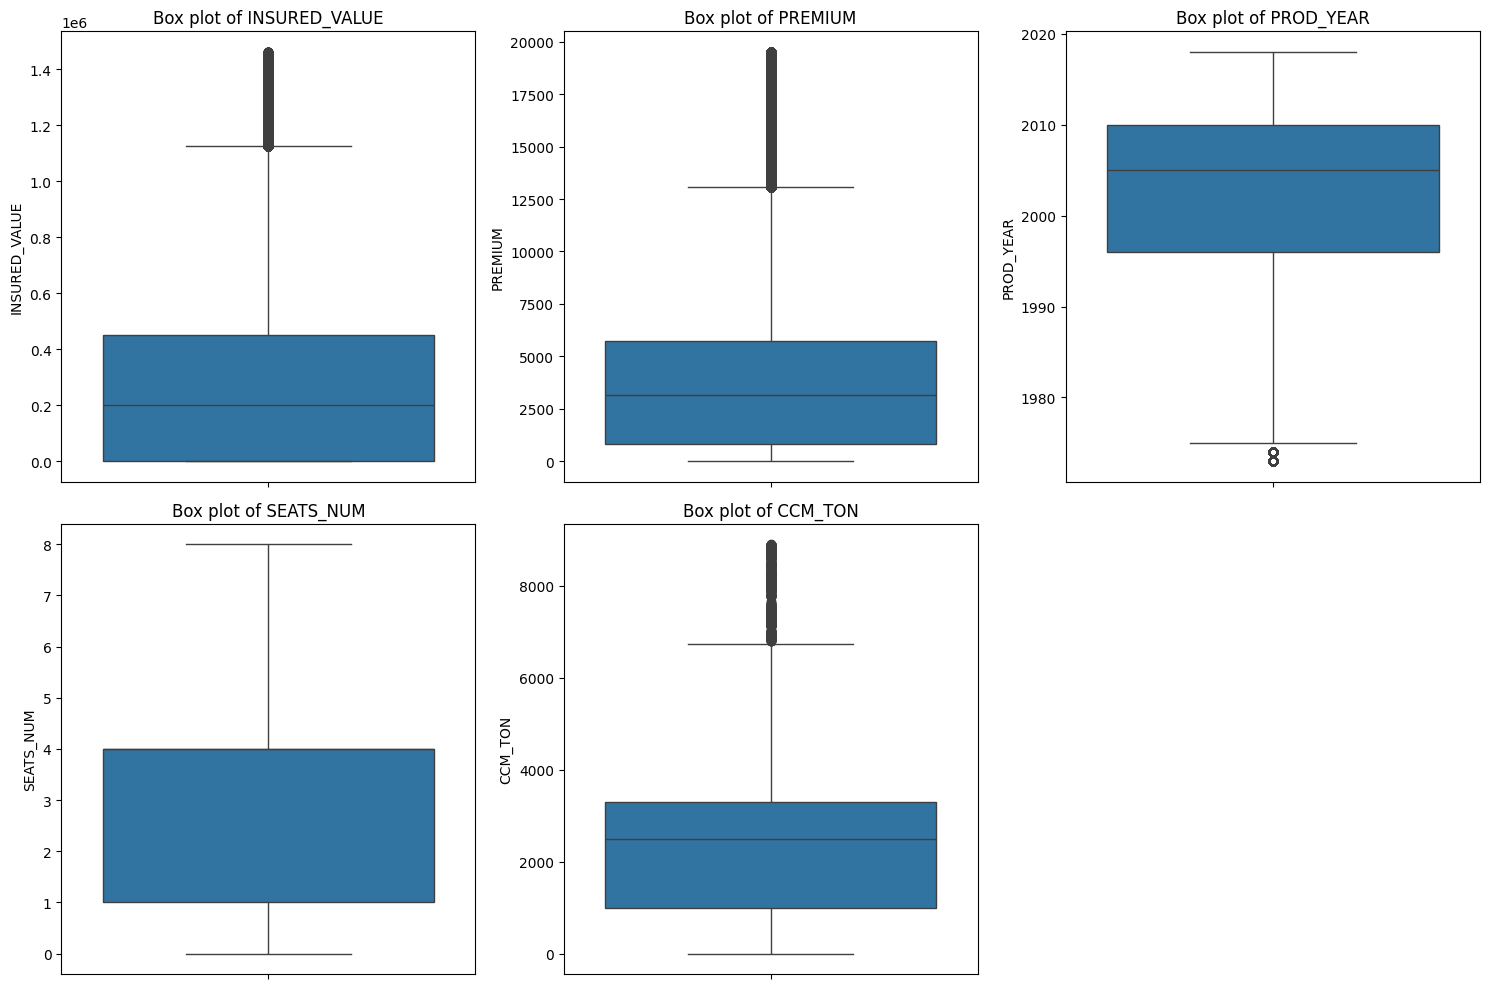

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for numerical columns
numerical_cols = ['INSURED_VALUE', 'PREMIUM', 'PROD_YEAR', 'SEATS_NUM', 'CCM_TON']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

### Encoding Variables

In [218]:
# Encode categorical variables using one-hot encoding
categorical_cols = ['SEX', 'INSR_TYPE', 'TYPE_VEHICLE', 'MAKE', 'USAGE']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

### Test & Train Data

In [225]:
from sklearn.model_selection import train_test_split

# Define features and target
numerical_cols = ['EFFECTIVE_YR', 'PROD_YEAR', 'SEATS_NUM', 'CCM_TON']
feature_cols = 'PREMIUM'

In [226]:
# Split the dataset
X = data[feature_cols]
y = data['PREMIUM']

In [227]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.